In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root = 'data/', download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST('data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F0235330EF0>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


Label:  5


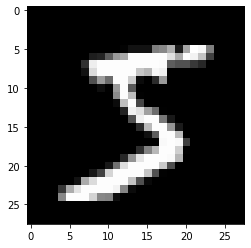

In [8]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label: ', label)

In [11]:
import torchvision.transforms as transforms

In [12]:
dataset = MNIST('data/', True, transform=transforms.ToTensor())

In [14]:
img_tensor, label  = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [15]:
# train validation test set 

import numpy as np

def split_indices(n):
  idxs = np.random.permutation(n)
  return idxs[n:], idxs[:n]

train_indices, val_indices = split_indices(10000)

In [17]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader


In [ ]:
batch_size = 100
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, sampler=val_sampler)


